# Implementar un MLP con Backpropagation para resolver el problema de la función XOR 

<img src="figs/fig-MLP_XOR.png" width="50%">


1. **Definir la arquitectura de la red**:  
   - La red tendrá 2 entradas (los valores binarios del XOR), una capa oculta con 2 neuronas, y una neurona de salida.
   - Usar la función de activación sigmoide en las neuronas de la capa oculta y de salida.
   - Establecer una tasa de aprendizaje (ej. 0.5) y el número de épocas de entrenamiento.

   Por ejemplo, para la capa de salida (2 neuronas en la capa oculta, 1 neurona de salida):
 $$ W^{(2)} \in \mathbb{R}^{1 \times 2} $$
 $$ b^{(2)} \in \mathbb{R}^{1 \times 1} $$

2. **Inicializar los pesos y los sesgos**:  
   - Inicializar los pesos de las conexiones de la capa de entrada a la capa oculta y de la capa oculta a la capa de salida, de manera aleatoria (puedes usar la inicialización Xavier).
   - También inicializar los sesgos de cada capa.

3. **Propagación hacia adelante (Forward pass)**:  
   - Para cada entrada, multiplicar las entradas por los pesos de la capa oculta y sumar el sesgo.
   - Aplicar la función de activación (sigmoide) para obtener las activaciones de la capa oculta.
   - Repetir el proceso con los valores de la capa oculta para calcular la activación de la capa de salida.

4. **Calcular el error**:  
   - Calcular el error en la salida utilizando una función de error, como el Error Cuadrático Medio (MSE).

5. **Backpropagation (Propagación hacia atrás)**:  
   - Calcular los gradientes de error en la capa de salida
   - Propagar el error hacia la capa oculta, calculando el gradiente de error en la capa oculta.
   
6. **Actualizar los pesos y sesgos**:  
   - Usar los gradientes obtenidos para ajustar los pesos y los sesgos de la capa de salida y de la capa oculta utilizando el gradiente descendente.
   
7. **Repetir el entrenamiento**:  
   - Repetir los pasos de forward, cálculo de error y backpropagation por el número de épocas definido hasta que el error disminuya significativamente.

8. **Evaluar el modelo**:  
   - Después del entrenamiento, probar la red con las entradas XOR y verificar que las salidas estén cerca de los valores esperados (0 o 1).
   






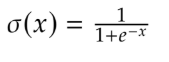

In [ ]:
import numpy as np

# Función de activación sigmoide
def sigmoid(x):
    # TODO: Implementar la función sigmoide
    return 1 / (1 + np.exp(-x))

# Derivada de la sigmoide: Se usa en la fase de backpropagation para ajustar los pesos correctamente.
def sigmoid_derivative(x): #Le pasamos la activacion de la neurona x = sigma(z) 
    #Implementar la derivada de la función sigmoide considerar que el valor x es  sigma(x)
    derivada = x * (1 - x) #

    return derivada

# Definimos los datos de entrada para XOR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Salidas esperadas para XOR
y = np.array([[0], 
              [1], 
              [1], 
              [0]])

# Inicializamos los pesos y bias aleatoriamente: Al principio la red no sabe nada, así que empezamos con valores aleatorios.
#Con el entrenamiento, esos valores se irán ajustando hasta que la red aprenda.
# Se establece la semilla para la generación de números pseudoaleatorios
np.random.seed(42)  # Para reproducibilidad de los experimentos

W1 =np.random.rand(2,2)  # Pesos entre capa de entrada y capa oculta
B1 = np.random.rand(1,2)  # Bias de la capa oculta
W2 = np.random.rand(2,1)  # Pesos entre capa oculta y capa de salida
B2 = np.random.rand(1,1)  # Bias de la capa de salida

# Definimos la tasa de aprendizaje:
#Si es muy alto → el modelo puede “saltar” y no aprender bien.
#Si es muy bajo → aprende muy despacio.
learning_rate = 0.5 # que tan rapido aprende la red

# Número de iteraciones de entrenamiento
epochs = 10000

for epoch in range(epochs): # Bucle de entrenamiento: Ejecuta todo el proceso de aprendizaje 10,000 veces.

    #----------------------------------------------
    # 1. Propagación hacia adelante (Forward pass)
    #----------------------------------------------
    #Capa oculta: Calcula la suma ponderada Z (z_c1) para la capa oculta
    z_c1 =  X@W1 + B1  # Suma ponderada de la capa oculta: Así calculamos la energía de activación que recibe cada neurona en la capa oculta.
    #Activación de la capa oculta: Calcula la activación de la capa oculta usando la función sigmoide
    a_c1  = sigmoid(z_c1)  # Aplica la función sigmoide a cada valor de z_c1: Convierte las sumas ponderadas en señales “suaves” entre 0 y 1.
    #Capa de salida — cálculo de entrada ponderada: Calcular la suma ponderada Z (z_c2)  para la capa de salida 
    z_c2 = a_c1@W2 + B2 # Suma ponderada de la capa de salida: Este valor z_c2 será la entrada a la última neurona, la que da la predicción final.
    #Activación de la capa de salida: Calcula la activación de la capa de salida usando la función sigmoide
    y_pred = sigmoid(z_c2) # Activación de la capa de salida: Queremos una salida entre 0 y 1 (porque el XOR solo da 0 o 1).

    #----------------------------------------------
    # 2. Cálculo del error con MSE (qué tanto se equivocó)
    #----------------------------------------------
    #Calcular el error cuadrático medio (MSE) : Mide la diferencia entre lo que la red predijo (y_pred) y lo que debería haber dicho (y).
    #Es necesario saber cuánto se equivocó para luego corregir los pesos en la siguiente fase (backpropagation)
    error = (y - y_pred) ** 2 # error por cada muestra del batch de entrenamiento
    mse = np.mean(error) # error medio del batch de entrenamiento
    total_error = np.sum(error) # error total del batch de entrenamiento

    #----------------------------------------------
    # 3. Propagación hacia atrás (Backward pass)
    #----------------------------------------------
    #----------------------------------------------
    # Gradiente de la salida
    #----------------------------------------------
    #Calcular la derivada del error con respecto a la salida y
    dE_dy_pred  = -2 * (y - y_pred) # Derivada del error con respecto a la salida y_pred:Calcula cómo cambia el error si cambia la salida (y_pred). 
    #Es el primer paso para saber qué dirección tomar para reducir el error.

    #Calcular la derivada de la activación de la salida con respecto a z_c2 
    d_y_pred_d_zc2 = sigmoid_derivative(y_pred) # Derivada de la activación de la salida con respecto a z_c2: Calcula cómo cambia la salida respecto a la entrada (z_c2).
    #Sirve para propagar el error hacia atrás a través de la función sigmoide.

    #Calcular delta de la capa de salida
    delta_c2 = dE_dy_pred * d_y_pred_d_zc2 # delta de la capa de salida : Combina ambos efectos: cómo el error depende de la salida y cómo la salida depende de la entrada.
    #delta_c2 es el “error local” de la capa de salida. Este valor servirá para ajustar sus pesos (W2) y su bias (B2).
    
    
    #----------------------------------------------
    # Gradiente en la capa oculta: Aquí empieza la parte donde el error, que se calculó al final de la red, viaja hacia atrás para decirle a las neuronas anteriores cuánto contribuyeron a ese error.
    #----------------------------------------------
    #Propagar el error hacia la capa oculta. Esto calcula el error local de la capa oculta, llamado delta_c1:nos dice cuánto corregir cada neurona de la capa oculta.
    #Recordemos que ya habíamos calculado delta_c2, que es el error en la capa de salida. Ahora queremos saber:¿Qué tanto fue culpa de la capa oculta que la salida se equivocara?
    delta_c1 = delta_c2 @ W2.T * sigmoid_derivative(a_c1) # delta de la capa oculta

    #----------------------------------------------
    # 4. Actualización de los pesos y biases :Ahora viene la parte donde la red neuronal realmente “aprende”, es decir: donde ajusta sus pesos y sesgos (biases) para cometer menos error en la siguiente vuelta.
    #Después de calcular los errores locales (delta_c2 y delta_c1), la red ya sabe:
    #Qué tan equivocada estuvo cada neurona.
    #Qué tanto debe cambiar cada conexión (peso) para mejorar.
    #----------------------------------------------
    #Actualizar los pesos y bias de la capa de salida
    W2  = W2 - a_c1.T @ delta_c2 * learning_rate #Actualiza los pesos entre la capa oculta y la capa de salida: Multiplica las salidas de la capa oculta (a_c1) por el error local de la capa de salida (delta_c2). Este producto nos dice cuánto debe ajustarse cada conexión entre neurona oculta y de salida. Si learning_rate es 0.5, significa “ajusta a la mitad de la magnitud del error”.Restamos porque queremos disminuir el error. Si el gradiente apunta “hacia arriba en la montaña del error”, restarlo nos lleva “cuesta abajo”.
    B2 =  B2 - np.sum(delta_c2, axis=0, keepdims=True) * learning_rate #Ajusta el bias (sesgo) de la capa de salida. Suma el error de todas las neuronas (o ejemplos) para tener una corrección global del bias. Restamos para movernos hacia la dirección que reduce el error.
    
    #Actualizar los pesos y bias de la capa oculta
    W1 = W1 - X.T @ delta_c1 * learning_rate #Ajusta los pesos entre la capa de entrada y la capa oculta:→ Mide cuánto contribuyó cada entrada (de X) al error de cada neurona oculta. Multiplicamos por el learning rate. Restamos para disminuir el error.
    B1 = B1 - np.sum(delta_c1, axis=0, keepdims=True) * learning_rate #Ajusta los biases de las neuronas ocultas
    # Imprimir el error cada 1000 épocas
    if epoch % 1000 == 0: 
        print(f"Época {epoch}, Error: {total_error}") # Imprimir el error cada 1000 épocas
        



# Comprobar los resultados del modelo entrenado
# Recordar: al final del entrenamiento los parámetros de la red ya se ajustaron, es decir, las matrices Ws y Bias Bs se usan para predecir nuevos datos através de la red.
print("\nResultados finales:")

for i in range(len(X)):
    #Realizar la propagación hacia adelante para cada entrada de prueba
    x = X[i] # Ejemplo de entrada i 
    x = x[np.newaxis, :] # Añade una nueva dimensión al vector x, para convertirlo de un vector a una matriz 1xN.
    z_hidden = x @ W1 + B1  # Suma ponderada de la capa oculta
    a_hidden = sigmoid(z_hidden)  # Activación de la capa oculta
    z_output = a_hidden @ W2 + B2  # Suma ponderada de la capa de salida: Aquí la red combina las señales procesadas por las neuronas ocultas para producir el valor final antes de aplicar la activación.
    y_pred = sigmoid(z_output)  # Activación de la capa de salida
    #y_pred =     # Predicción para el ejemplo i
    # Mostrar las predicciones
    print(f"Entrada: {X[i]}, Salida estimada: {y_pred}, Salida real: {y[i]}") # Mostrar las predicciones



Época 0, Error: 1.2986343258576976

Resultados finales:
Entrada: [0 0], Salida estimada: [[0.08620875]], Salida real: [0]
Entrada: [0 1], Salida estimada: [[0.91729343]], Salida real: [1]
Entrada: [1 0], Salida estimada: [[0.91705169]], Salida real: [1]
Entrada: [1 1], Salida estimada: [[0.09166514]], Salida real: [0]
